# Задание на лабораторную работу:
<br>
<br>
Разработать собственную программу на языке Python для ранжирования признаков по
их информативности для различения заданного набора данных. Использовать набор
данных, соответствующий Вашему варианту (название файла с данными Y.csv, где Y –
номер варианта). Имя класса указанно в столбце class. Необходимо выбрать указанное количество информативных признаков и корректно оценить ошибку классификации данных. Номер варианта указан в задании к лабораторной работе No1.
<br>
<br>

**Результаты, которые необходимо получить в итоге:**

- Списки информативных признаков.
- График зависимости точности от числа информативных признаков и метода
отбора информативных признаков.
- Выводы о информативности различных признаков.

<br>
<br>

Учитывая данные, узнайте количество классов N и выберите признаки N + K (сохраните список выбранных функций), где K - день месяца, когда вы родились. Проведите перекрестную проверку для измерения точности: проведите 5 тестов (обучите 5 моделей), конечная точность равна средней точности среди всех тестов. Затем нарисуйте график зависимости точности от количества выбранных признаков (N .. N + K).

# <center> Содержание </center>

Всю работу можно условно разделить на 5 этапов:

1. Эксплоративный анализ данных;
2. 5 методов отбора признаков;
3. Поиск лучших признаков;
4. Исследование зависимости точности от количества выбранных признаков;
5. Результаты работы.

- На первом этапе проводится первичный анализ данных, на котором нужно определить количество классов, типы данных имеющихся признаков, наличие NaN-значений;
- На втором этапе рассматриваются 5 различных способов отбора признаков (статистические, жадный алгоритм, базирующиеся на моделях машинного обучения). Определяются наборы признаков, приводится небольшое теоретическое описание принципа работы способа отбора;
- На третьем этапе в качестве лучших признаков выбираются те, которые были отобраны максимальным количеством способов отбора (согласно условию варианта соствлялся топ-5, но т.к. график для признаков N...N+K выходит довольно скудным из-за этого, то я брала топ-14, который содержит признаки, встретившиеся минимум в 2 способах отбора);
- На четвертом этапе на 5 алгоритмах классификации было проведено исследование влияние количества признаков на точность. Также был проведен небольшой анализ способа отбора признаков хи-квадарат, так как в результате теоретического исследования методов было сделано предположение о не совсем целесобразом его использовании в контексте исходных данных;
- На пятом этапе были сформированы выводы из произведенного анализа.



In [1]:
! pip install seaborn==0.11.0

In [2]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid")
sns.set_palette(palette = 'pastel')
# color palette for seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True)

import warnings
warnings.simplefilter(action='ignore')

In [3]:
# лабораторная работа написана с использованием google colab pro
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [4]:
# загрузка данных
data = pd.read_csv('/content/drive/My Drive/45.csv')
data.head()

name  area class   gray_Mean  gray_Variance  \
0  76.result_100x439.bmp   144     D  128.854167      12.916233   
1  76.result_100x445.bmp   144     D  125.229167      75.232205   
2  76.result_100x466.bmp   144     D  125.340278      58.585600   
3  76.result_100x487.bmp   144     D  112.743056     208.871480   
4  76.result_100x518.bmp   144     D  157.125000      25.817708   

   gray_Skewness  gray_Kurtosis  gray_Perc.01%  gray_Perc.10%  gray_Perc.50%  \
0      -0.314884      -0.901970            121            123            129   
1      -1.380387       1.628587            100            113            127   
2      -1.704788       4.343703             95            118            127   
3       0.602405      -1.202266             93             99            106   
4      -0.397793      -0.323166            146            149            158   

   gray_Perc.90%  gray_Perc.99%  gray_S(1,0)AngScMom  gray_S(1,0)Contrast  \
0            133            135             0.019025             3.060606   
1            134            138             0.011794             3.833333   
2            133            136             0.011737             7.787879   
3            136            137             0.008896            16.030303   
4            164            167             0.017992             3.212121   

   gray_S(1,0)Correlat  gray_S(1,0)SumOfSqs  gray_S(1,0)InvDfMom  \
0             0.885952            10.526515             0.486768   
1             0.975430            72.056818             0.454531   
2             0.926910            48.227273             0.355055   
3             0.961301           194.621212             0.267826   
4             0.931240            19.912879             0.452591   

   gray_S(1,0)SumAverg  gray_S(1,0)SumVarnc  gray_S(1,0)SumEntrp  \
0           255.454545         64600.035966             1.388758   
1           248.348485         61203.920613             1.577895   
2           248.863636         61356.663017             1.575650   
3           223.181818         49880.467767             1.668734   
4           312.545455         96855.803750             1.473781   

   gray_S(1,0)Entropy  gray_S(1,0)DifVarnc  gray_S(1,0)DifEntrp  \
0            1.816698             1.243817             0.625826   
1            2.006473             1.541586             0.671167   
2            2.016765             3.585976             0.775146   
3            2.143062             8.296894             0.935292   
4            1.859143             1.186109             0.613053   

   gray_S(0,1)AngScMom  gray_S(0,1)Contrast  gray_S(0,1)Correlat  \
0             0.019628             2.969697             0.877346   
1             0.008810            33.265152             0.709268   
2             0.008666            21.977273             0.765677   
3             0.008695            24.212121             0.939767   
4             0.024994             1.462121             0.971584   

   gray_S(0,1)SumOfSqs  gray_S(0,1)InvDfMom  gray_S(0,1)SumAverg  \
0             9.378788             0.452831           255.348485   
1            52.166667             0.266079           250.295455   
2            42.181818             0.279663           249.598485   
3           188.719697             0.295563           222.848485   
4            22.136364             0.652477           312.325758   

   gray_S(0,1)SumVarnc  gray_S(0,1)SumEntrp  gray_S(0,1)Entropy  \
0         64564.609669             1.342274            1.797150   
1         62059.893514             1.570060            2.138229   
2         61686.669845             1.564080            2.127282   
3         49694.430901             1.681814            2.149528   
4         96717.515500             1.494503            1.771550   

   gray_S(0,1)DifVarnc  gray_S(0,1)DifEntrp  gray_S(1,1)AngScMom  \
0             1.029299             0.597829             0.015368   
1            22.955659             1.004713             0.007035   
2            13.593549     

In [5]:
print('Размер данных: ', data.shape)
print('Количество численных признаков: ', len(data.select_dtypes(include='number').columns))
print('Количество категориальных признаков: ', len(data.select_dtypes(include='object').columns))

Размер данных:  (7264, 1641)
Количество численных признаков:  1633
Количество категориальных признаков:  8


In [6]:
print('Пустые значения: ')
data.isnull().sum().value_counts()

Пустые значения: 


0    1641
dtype: int64

Пустых значений (missing data) нет.

Целевая переменная находится в столбцe 'class':

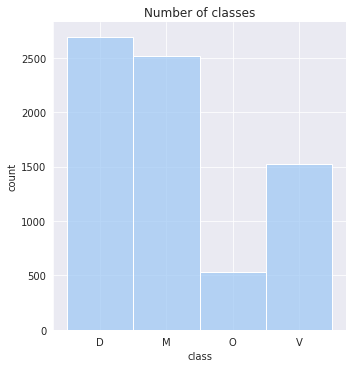

In [7]:
ax = sns.displot(data=data, x="class")
ax = ax.set(ylabel="count", title='Number of classes')

Как видно из графика, данные делятся на 4 класса: D, M, O, V.
<br>
Исходя из задания на лабораторную работу, нужно взять N + K признаков, в моём случае - N=4, K=1 => всего 5 признаков

Так как в наборе присутствуют категориальные признаки, то нужно их дополнительно исследовать, так как возможно неправильно проставлен тип данных (или если это действительно категориальный признак, то его нужно правильно закодировать):

In [8]:
categorical_columns = data.select_dtypes(include='object').columns.to_list()
print('Столбцы, содержащие категориальные признаки: ', categorical_columns)

Столбцы, содержащие категориальные признаки:  ['name', 'class', 'b_S(3,-3)Correlat', 'b_S(4,-4)Correlat', 'b_S(5,-5)Correlat', 's_S(3,-3)Correlat', 's_S(4,-4)Correlat', 's_S(5,-5)Correlat']


In [9]:
# выведем шапку датафрейма, содержащую только категориальные столбцы

data[categorical_columns].head()

,name,class,"b_S(3,-3)Correlat","b_S(4,-4)Correlat","b_S(5,-5)Correlat","s_S(3,-3)Correlat","s_S(4,-4)Correlat","s_S(5,-5)Correlat"
0,76.result_100x439.bmp,D,0.123331,-0.0340827,-0.0880412,-0.0294963,-0.135633,-0.157597
1,76.result_100x445.bmp,D,-0.312659,-0.428212,-0.359759,-0.30172,-0.417655,-0.353452
2,76.result_100x466.bmp,D,-0.355247,-0.263723,0.00972835,-0.360211,-0.215852,0.078853
3,76.result_100x487.bmp,D,-0.0722482,-0.344971,-0.554774,-0.0706749,-0.351913,-0.585312
4,76.result_100x518.bmp,D,0.32464,-0.0469713,-0.3332,-0.00039208,-0.286647,-0.445503


Как видно, действительно есть столбцы, которые имеют тип object, но содержат числовые значения. Также в категориальных признаках присутствует целевая переменная и название изображения. Исследуем столбец 'name':

In [10]:
data.name.value_counts()

76.result_178x561.bmp    3
76.result_625x615.bmp    3
76.result_606x606.bmp    3
76.result_174x555.bmp    3
76.result_491x707.bmp    3
                        ..
76.result_336x535.bmp    1
76.result_191x522.bmp    1
76.result_572x581.bmp    1
76.result_599x625.bmp    1
76.result_147x412.bmp    1
Name: name, Length: 4748, dtype: int64

Видим, что есть повторяющиеся элементы, проверим наличие дублирующихся строк в данных:

In [11]:
print('После удаления размер данных не меняется? ', data.drop_duplicates().shape[0] == data.shape[0])

После удаления размер данных не меняется?  True


Значит, столбец 'name' необходимо закодировать. Также произведем кодирование столбца с целевыми переменными - 'class':

In [12]:
from sklearn import preprocessing

le_name = preprocessing.LabelEncoder()
le_class = preprocessing.LabelEncoder()

le_name.fit(data['name'])
data['name'] = le_name.transform(data['name'])

le_class.fit(data['class'])
data['class'] = le_class.transform(data['class'])

data[['name', 'class']].head()

,name,class
0,3,0
1,4,0
2,6,0
3,8,0
4,10,0


Также изменим тип данных других столбцов:

In [13]:
for column in categorical_columns[2:]:
  data[column] = data[column].apply(lambda row: str(row).replace(',', '.'))
  data[column] = pd.to_numeric(data[column])

Данные подготовлены, теперь можно проводить отбор признаков.

# Feature Selection

Отбор признаков можно проводить разными способами. Попробуем несколько вариантов.

## Correlation

Первый и самый простой - корреляция между признаками. Корреляцию можно рассчитывать разными способами (коэффициент коррлеяции Пирсона, например), я использую корреляцию Спирмена, которая устойчивее к аномалиям в данных (нежели Пирсон).
<br>
Задача отбора признаков - поиск признаков, которые наиболее сильно воздействуют на целевую переменную. Корреляция Спирмена же говорит только о линейной зависимости между признаками ( если коэффициент = |1|, то есть линейная зависимость, если коэффициент = 0, то линейной зависимости нет), поэтому нельзя говорить, что признак не влияет, если была обнаружена корреляция, равная 0, возможно, зависимоть имеет характер сложнее линейного (например, квадратичная или кубическая).

In [14]:
corr = data.corr(method ='spearman')
classes = corr.sort_values(by=['class'], ascending=False).head(1).T
classes = classes.sort_values(by=['class'],ascending=False).T

In [15]:
classes_abs = classes.T.apply(lambda row: abs(row)).sort_values(by=['class'], ascending=False)
classes_abs.iloc[1:6, :]

,class
h_Perc.90%,0.736196
h_Perc.99%,0.721956
"h_S(5,5)SumVarnc",0.710218
"h_S(5,5)SumAverg",0.710084
"h_S(4,4)SumAverg",0.709924


In [16]:
corr_features = classes_abs.iloc[1:6, :].index.to_list()
print('Топ-5 признаков, отобранных корреляцией: ', corr_features)

Топ-5 признаков, отобранных корреляцией:  ['h_Perc.90%', 'h_Perc.99%', 'h_S(5,5)SumVarnc', 'h_S(5,5)SumAverg', 'h_S(4,4)SumAverg']


## Chi-2

Проверяет, есть ли значительная разница между наблюдаемой и ожидаемой частотами двух категориальных чисел. Таким образом, проверяется нулевая гипотеза об отсутствии связи между переменными:

<center> $X^{2}=\frac{(\textrm{Observed frequency} - \textrm{Expected frequency})^2}{\textrm{Expected frequency}}$ </center>


Критерий хи-квадрат лучше использовать при работе с категориальными, независимыми переменными, которые имеют частоту больше 5 в 80% случаев.

Также он используется для неотрицательных признаков, поэтому необходимо привести данные к иному виду с помощью MinMax.

**Как работает критерий хи-квадрат?**

Пусть нам нужно определить взаимосвязь между независимым категориальным признаком и зависимым категориальным признаком. 

При выборе функций мы стремимся выбрать функции, которые сильно зависят от ответа. Если две функции независимы, наблюдаемое количество близко к ожидаемому, то у нас будет меньшее значение хи-квадрат. Высокое значение хи-квадрат указывает на то, что гипотеза независимости неверна. 

Иными словами, чем выше значение хи-квадрат, тем больше функция зависит от реакции, и ее можно выбрать для обучения модели.


Так что скорее всего, признаки, которые были отобраны хи-квадратом, не будут хорошо совпадать с признаками, которые отбираются другими методами.

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

features_norm = MinMaxScaler().fit_transform(data.drop(['class'], axis=1))
chi_selector = SelectKBest(chi2, k=5)
chi_selector.fit(features_norm, data['class'])

chi_support = chi_selector.get_support()
chi_features = data.drop(['class'], axis=1).loc[:,chi_support].columns.tolist()
print('Топ-5 признаков, отобранных chi-2: ', chi_features)

Топ-5 признаков, отобранных chi-2:  ['r_S(3,3)SumVarnc', 'r_S(4,4)SumVarnc', 'v_S(3,3)SumVarnc', 'v_S(3,-3)SumVarnc', 'v_S(4,4)SumVarnc']


## RFE (Recursive Feature Removal)

Алгоритм жадного поиска, который выбирает признаки, рекурсивно определяя все меньшие наборы признаков, ранжирует признаки в соответствии с порядком их удаления.

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=100, verbose=5)
rfe_selector.fit(features_norm, data['class'])
rfe_support = rfe_selector.get_support()
rfe_features = data.drop(['class'], axis=1).loc[:,rfe_support].columns.tolist()
print('Топ-5 признаков, отобранных RFE: ', rfe_features)

Fitting estimator with 1640 features.
Fitting estimator with 1540 features.
Fitting estimator with 1440 features.
Fitting estimator with 1340 features.
Fitting estimator with 1240 features.
Fitting estimator with 1140 features.
Fitting estimator with 1040 features.
Fitting estimator with 940 features.
Fitting estimator with 840 features.
Fitting estimator with 740 features.
Fitting estimator with 640 features.
Fitting estimator with 540 features.
Fitting estimator with 440 features.
Fitting estimator with 340 features.
Fitting estimator with 240 features.
Fitting estimator with 140 features.
Fitting estimator with 40 features.
Топ-5 признаков, отобранных RFE:  ['r_Perc.01%', 'h_Perc.99%', 'h_S(1,1)Correlat', 'v_Perc.01%', 'v_Perc.90%']


Отбор признаков с использованием алгоритмов классификации:

## Lasso regression

изображение:  [LASSO](https://drive.google.com/file/d/1Af40blXXIj61ISn5vSq6rqWhwSOAAFhL/view?usp=sharing)

Лассо-регуляризация сдвигает признаки с наименьшим весом к нулю, создавая разреженный вектор параметров.

На изображении квадрат с нулевым центром - границы Лассо в двумерном сценарии. Если рассматривать общую линию, то вероятность того, что эта линия будет касательной к квадрату, выше в углах, где по крайней мере один из параметров равен нулю (в двумерном сценарии - один).

Важный параметр - параметр $C$ в логистической регрессии, так как именно он будет в результате отвечать за количество подобранных признаков.


In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(C=0.003, penalty="l1", solver='liblinear'))
embeded_lr_selector.fit(features_norm, data['class'])

SelectFromModel(estimator=LogisticRegression(C=0.003, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [20]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = data.drop(['class'], axis=1).loc[:,embeded_lr_support].columns.tolist()
print('Количество признаков, отобранных регрессией Лассо: ', len(embeded_lr_feature))
print('Признаки, отобранные регрессией Лассо: ', embeded_lr_feature)

Количество признаков, отобранных регрессией Лассо:  9
Признаки, отобранные регрессией Лассо:  ['name', 'r_Perc.90%', 'r_Perc.99%', 'g_S(1,0)InvDfMom', 'h_Perc.50%', 's_Perc.99%', 'v_Perc.90%', 'v_Perc.99%', 'v_S(3,3)SumVarnc']


## Random Forest

**Как случайный лес выбирает объекты?**

- Случайные леса состоят из нескольких сотен деревьев решений, где каждое строится на случайном извлечении наблюдений из набора данных и случайном извлечении признаков. 

- Не каждое дерево видит все признаки или все наблюдения, и это гарантирует, что деревья декоррелированы и, следовательно, менее подвержены переобучению.

- Каждое дерево также представляет собой последовательность вопросов,  основанных на одном признаке или некоторой комбинации признаков. Каждый узел делит набор данных на 2 сегмента, которые хранят наблюдения, являющиеся наиболее похожими между собой и отличающимися от наблюдений в другом сегменте.

- Следовательно, важность каждой функции определяется тем, насколько является "чистым" каждый из сегментов.

**Как случайный лес отбирает признаки?**

- Для классификации степень хаоса измерняется  критерием Джини/энтропией/информационным приростом.

- Следовательно, при обучении дерева можно вычислить, насколько каждый признак уменьшает хаос. Чем больше признак уменьшает хаос, тем важнее этот признак. 

- В случайных лесах уменьшение хаоса от каждого признака может быть усреднено по деревьям, чтобы определить окончательную важность переменной.

- В целом можно сказать, что признаки, которые выбирались в верхней части деревьев, в целом более важны, чем признаки, выбранные в конечных узлах деревьев, поскольку обычно верхние разделения приводят к большему количеству информации в сегментах.


In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=1000))
embeded_rf_selector.fit(data.drop(['class'], axis=1), data['class'])

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False

In [22]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = data.drop(['class'], axis=1).loc[:,embeded_rf_support].columns.tolist()
print('Количество признаков, отобранных случайным лесом: ', len(embeded_rf_feature))
print('Признаки, отобранные случайным лесом: ', embeded_rf_feature)

Количество признаков, отобранных случайным лесом:  231
Признаки, отобранные случайным лесом:  ['name', 'gray_Mean', 'gray_Skewness', 'gray_Kurtosis', 'gray_Perc.01%', 'gray_Perc.10%', 'gray_Perc.90%', 'gray_Perc.99%', 'gray_S(1,0)SumAverg', 'gray_S(1,0)SumVarnc', 'gray_S(0,1)SumAverg', 'gray_S(0,1)SumVarnc', 'gray_S(1,1)SumAverg', 'gray_S(1,1)SumVarnc', 'gray_S(1,-1)SumAverg', 'gray_S(1,-1)SumVarnc', 'gray_S(2,0)SumAverg', 'gray_S(2,0)SumVarnc', 'gray_S(0,2)SumAverg', 'gray_S(0,2)SumVarnc', 'gray_S(2,2)SumAverg', 'gray_S(2,2)SumVarnc', 'gray_S(2,-2)SumAverg', 'gray_S(2,-2)SumVarnc', 'gray_S(3,0)SumAverg', 'gray_S(3,0)SumVarnc', 'gray_S(0,3)SumAverg', 'gray_S(0,3)SumVarnc', 'gray_S(3,3)SumVarnc', 'gray_S(3,-3)SumVarnc', 'gray_S(4,0)SumAverg', 'gray_S(4,0)SumVarnc', 'gray_S(0,4)SumAverg', 'gray_S(0,4)SumVarnc', 'gray_S(4,4)SumAverg', 'gray_S(4,-4)SumAverg', 'gray_S(5,0)SumAverg', 'gray_S(5,0)SumVarnc', 'gray_S(0,5)SumAverg', 'gray_S(0,5)SumVarnc', 'gray_S(5,5)SumAverg', 'gray_S(5,5)SumVa

Также для задачи уменьшения количества признаков можно использовать такие методы как PCA (метод главных компонент), которые не выбирают признаки, а создают новые на основе исходных (например, вместо 10 признаков будет использоваться их линейная комбинация).

## Топ-5 выделенных признаков:

Для того, чтобы выделить самые важные признаки, посчитаю количество вхождений каждого признака в списки, полученные в результате работы каждого из пяти методов feature selection.


In [23]:
def is_important_feature(row, features):
    names = []
    for index in row.index.to_list():
        if index in features:
            names.append(index)
        else:
            names.append(np.NaN)
    return names

In [96]:
columns = data.drop('class', axis=1).columns
feature_names = pd.DataFrame({'features': columns})
feature_names = feature_names.set_index('features')
feature_names[['correlation', 'chi_2', 'rfe', 'l-1', 'rf']] = np.nan

In [97]:
feature_names.correlation = feature_names.apply(lambda row: is_important_feature(row, corr_features))
feature_names.chi_2 = feature_names.apply(lambda row: is_important_feature(row, chi_features))
feature_names.rfe = feature_names.apply(lambda row: is_important_feature(row, rfe_features))
feature_names.lr = feature_names.apply(lambda row: is_important_feature(row, embeded_lr_feature))
feature_names.rf = feature_names.apply(lambda row: is_important_feature(row, embeded_rf_feature))

In [98]:
feature_names

,correlation,chi_2,rfe,l-1,rf
features,,,,,
name,NaN,NaN,NaN,NaN,name
area,NaN,NaN,NaN,NaN,NaN
gray_Mean,NaN,NaN,NaN,NaN,gray_Mean
gray_Variance,NaN,NaN,NaN,NaN,NaN
gray_Skewness,NaN,NaN,NaN,NaN,gray_Skewness
...,...,...,...,...,...
v_GrMean,NaN,NaN,NaN,NaN,NaN
v_GrVariance,NaN,NaN,NaN,NaN,NaN
v_GrSkewness,NaN,NaN,NaN,NaN,NaN


Посмотрим на признаки, которые отбрал хи-квадарат и сравним, были ли отобраны эти признаки другими методами:

In [99]:
feature_names.loc[feature_names.chi_2.notnull()]

,correlation,chi_2,rfe,l-1,rf
features,,,,,
"r_S(3,3)SumVarnc",NaN,"r_S(3,3)SumVarnc",NaN,NaN,"r_S(3,3)SumVarnc"
"r_S(4,4)SumVarnc",NaN,"r_S(4,4)SumVarnc",NaN,NaN,"r_S(4,4)SumVarnc"
"v_S(3,3)SumVarnc",NaN,"v_S(3,3)SumVarnc",NaN,NaN,"v_S(3,3)SumVarnc"
"v_S(3,-3)SumVarnc",NaN,"v_S(3,-3)SumVarnc",NaN,NaN,"v_S(3,-3)SumVarnc"
"v_S(4,4)SumVarnc",NaN,"v_S(4,4)SumVarnc",NaN,NaN,"v_S(4,4)SumVarnc"


Как видно, эти же признаки попали в самый большой набор признаков, созданный случайным лесом.

In [100]:
feature_names['counts'] = 5 - feature_names.isnull().sum(axis=1)
feature_names['counts'].value_counts()

0    1409
1     217
2      13
3       1
Name: counts, dtype: int64

Видим, что 1415 признаков не попали ни в один список важных признаков, 212 попали в 1 список, 12 признаков в 2 списка и 1 признак в 1 список. Изобразим на barplot Топ-12 признаков:

In [101]:
feature_names = feature_names.loc[feature_names.counts > 1]

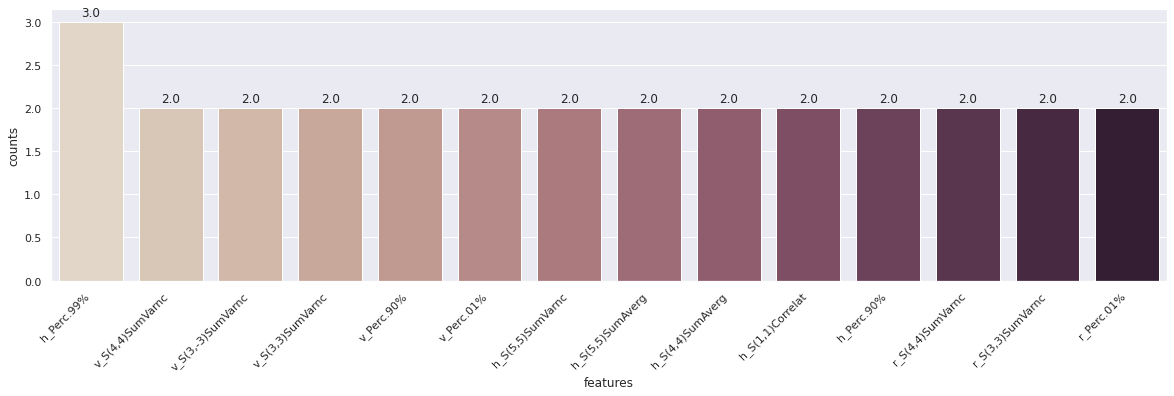

In [102]:
plt.figure(figsize=(20,5))
features_counts = feature_names['counts'].sort_values(ascending=False).to_frame()
ax = sns.barplot(x=features_counts.index, y='counts', data=features_counts,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_xticklabels(features_counts.index, rotation = 45, ha="right")

Так как по заданию нужно выбрать всего  5 признаков, то из полученного выше списка возьмем первые пять признаков:

In [145]:
top_features = features_counts[:14].index.to_list()

In [146]:
top_features

['h_Perc.99%',
 'v_S(4,4)SumVarnc',
 'v_S(3,-3)SumVarnc',
 'v_S(3,3)SumVarnc',
 'v_Perc.90%',
 'v_Perc.01%',
 'h_S(5,5)SumVarnc',
 'h_S(5,5)SumAverg',
 'h_S(4,4)SumAverg',
 'h_S(1,1)Correlat',
 'h_Perc.90%',
 'r_S(4,4)SumVarnc',
 'r_S(3,3)SumVarnc',
 'r_Perc.01%']

# Исследование зависимости качества работы алгоритма от количества признаков

In [89]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

In [147]:
def calculate_accuracy(clf, end_point):
  clf_results = []
  for num_features in range(4, end_point):
    score = cross_val_score(clf, data[top_features[:num_features]], data['class'], cv=10, scoring='accuracy')
    clf_results.append(np.mean(score))
    print('Средняя оценка для {} признаков: '.format(num_features), np.mean(score) )
  return clf_results

## Топ-5 признаков:

(так как из условия варианта получилось всего 5 признаков для отбора, что довольно мало, также построю для топ-14 признаков, полученных в результате отбора)

In [106]:
d_tree_results_5, gb_results_5, lr_results_5, lgb_results_5, gnb_results_5 = [],[],[],[],[]

In [90]:
dtree = DecisionTreeClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
gnb = clf = GaussianNB()
lgb = lgb.LGBMClassifier()

In [107]:
d_tree_results_5 = calculate_accuracy(dtree, 6)

Средняя оценка для 4 признаков:  0.9416341734210937
Средняя оценка для 5 признаков:  0.9531964638254496


In [108]:
gb_results_5 = calculate_accuracy(gb, 6)

Средняя оценка для 4 признаков:  0.9476925059018344
Средняя оценка для 5 признаков:  0.9558127858553018


In [109]:
lr_results_5 = calculate_accuracy(lr, 6)

Средняя оценка для 4 признаков:  0.4835930898329298
Средняя оценка для 5 признаков:  0.7607345178684431


In [110]:
lgb_results_5 = calculate_accuracy(lgb, 6)

Средняя оценка для 4 признаков:  0.9504473268384735
Средняя оценка для 5 признаков:  0.9651744404151555


In [111]:
gnb_results_5 = calculate_accuracy(gnb, 6)

Средняя оценка для 4 признаков:  0.8728028692577897
Средняя оценка для 5 признаков:  0.8781723070393822


In [112]:
results_top_5  = pd.DataFrame({'number of features': np.arange(4,6), 'dtree': d_tree_results_5,
                               'gradient boosting': gb_results_5, 'logistic regression': lr_results_5,
                               'gaussian NB': gnb_results_5, 'lightgbm': lgb_results_5})
results_top_5 = results_top_5.set_index('number of features')
results_top_5

,dtree,gradient boosting,logistic regression,gaussian NB,lightgbm
number of features,,,,,
4,0.941634,0.947693,0.483593,0.872803,0.950447
5,0.953196,0.955813,0.760735,0.878172,0.965174


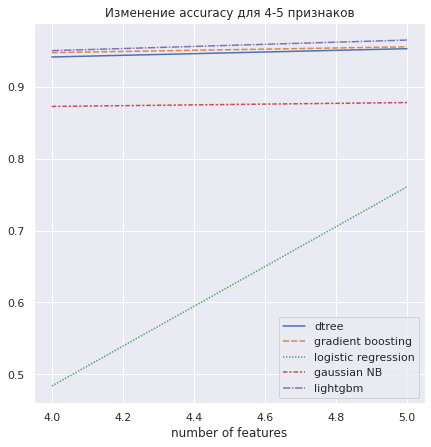

In [113]:
sns.set_theme(style="darkgrid")

fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=results_top_5,
             palette='deep')
ax = plt.title('Изменение accuracy для 4-5 признаков')

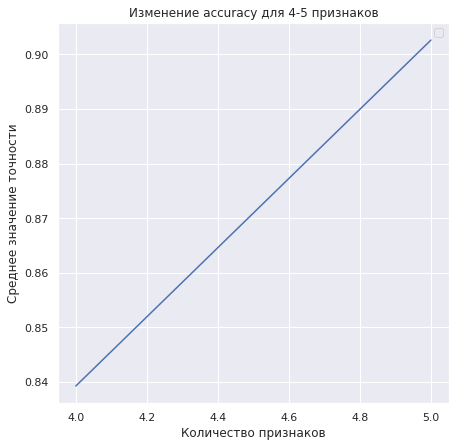

In [114]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=results_top_5.T.mean().to_frame(),
             palette='deep')
plt.title('Изменение accuracy для 4-5 признаков')
plt.ylabel('Среднее значение точности')
plt.legend('')
ax = plt.xlabel('Количество признаков')

## Топ-14 признаков:

In [44]:
d_tree_results, gb_results, lr_results, lgb_results, gnb_results = [],[],[],[],[]

In [148]:
d_tree_results = calculate_accuracy(dtree, 15)

Средняя оценка для 4 признаков:  0.9416341734210937
Средняя оценка для 5 признаков:  0.9531964638254496
Средняя оценка для 6 признаков:  0.9823818401597568
Средняя оценка для 7 признаков:  0.9874740906627864
Средняя оценка для 8 признаков:  0.9871987980341114
Средняя оценка для 9 признаков:  0.9869238843354136
Средняя оценка для 10 признаков:  0.9862363158911865
Средняя оценка для 11 признаков:  0.9880256232450805
Средняя оценка для 12 признаков:  0.9876129684995508
Средняя оценка для 13 признаков:  0.9867863327535703
Средняя оценка для 14 признаков:  0.9872003137540213


In [149]:
gb_results = calculate_accuracy(gb, 15)

Средняя оценка для 4 признаков:  0.9476925059018344
Средняя оценка для 5 признаков:  0.9558127858553018
Средняя оценка для 6 признаков:  0.9849974043296539
Средняя оценка для 7 признаков:  0.9916042379528687
Средняя оценка для 8 признаков:  0.990640808485
Средняя оценка для 9 признаков:  0.9914664969060368
Средняя оценка для 10 признаков:  0.9918797200465324
Средняя оценка для 11 признаков:  0.9924306842338602
Средняя оценка для 12 признаков:  0.9924306842338602
Средняя оценка для 13 признаков:  0.9924306842338602
Средняя оценка для 14 признаков:  0.9921552021401965


In [150]:
lr_results = calculate_accuracy(lr, 15)

Средняя оценка для 4 признаков:  0.4835930898329298
Средняя оценка для 5 признаков:  0.7607345178684431
Средняя оценка для 6 признаков:  0.7877114902937087
Средняя оценка для 7 признаков:  0.8071255887624526
Средняя оценка для 8 признаков:  0.804921163618175
Средняя оценка для 9 признаков:  0.8100168244910023
Средняя оценка для 10 признаков:  0.8094688917434947
Средняя оценка для 11 признаков:  0.8053379865934573
Средняя оценка для 12 признаков:  0.7939136267009219
Средняя оценка для 13 признаков:  0.7994196687394137
Средняя оценка для 14 признаков:  0.8186937525814605


In [151]:
lgb_results = calculate_accuracy(lgb, 15)

Средняя оценка для 4 признаков:  0.9504473268384735
Средняя оценка для 5 признаков:  0.9651744404151555
Средняя оценка для 6 признаков:  0.9887135706192851
Средняя оценка для 7 признаков:  0.994908317891937
Средняя оценка для 8 признаков:  0.9943579220995755
Средняя оценка для 9 признаков:  0.9944952842164299
Средняя оценка для 10 признаков:  0.9951832315906344
Средняя оценка для 11 признаков:  0.9953205937074887
Средняя оценка для 12 признаков:  0.9953205937074887
Средняя оценка для 13 признаков:  0.9953205937074887
Средняя оценка для 14 признаков:  0.9953205937074887


In [152]:
gnb_results = calculate_accuracy(gnb, 15)

Средняя оценка для 4 признаков:  0.8728028692577897
Средняя оценка для 5 признаков:  0.8781723070393822
Средняя оценка для 6 признаков:  0.8763824312905217
Средняя оценка для 7 признаков:  0.8938651236637982
Средняя оценка для 8 признаков:  0.8951047930852857
Средняя оценка для 9 признаков:  0.8962055846700088
Средняя оценка для 10 признаков:  0.8963433257168407
Средняя оценка для 11 признаков:  0.8975820478133845
Средняя оценка для 12 признаков:  0.892487334265501
Средняя оценка для 13 признаков:  0.8883575659053964
Средняя оценка для 14 признаков:  0.8890462711395563


In [156]:
results_top_14 = pd.DataFrame({'number of features': np.arange(4,15), 'dtree': d_tree_results,
                               'gradient boosting': gb_results, 'logistic regression': lr_results,
                               'gaussian NB': gnb_results, 'lightgbm': lgb_results})
results_top_14 = results_top_14.set_index('number of features')
results_top_14

,dtree,gradient boosting,logistic regression,gaussian NB,lightgbm
number of features,,,,,
4,0.941634,0.947693,0.483593,0.872803,0.950447
5,0.953196,0.955813,0.760735,0.878172,0.965174
6,0.982382,0.984997,0.787711,0.876382,0.988714
7,0.987474,0.991604,0.807126,0.893865,0.994908
8,0.987199,0.990641,0.804921,0.895105,0.994358
9,0.986924,0.991466,0.810017,0.896206,0.994495
10,0.986236,0.991880,0.809469,0.896343,0.995183
11,0.988026,0.992431,0.805338,0.897582,0.995321
12,0.987613,0.992431,0.793914,0.892487,0.995321


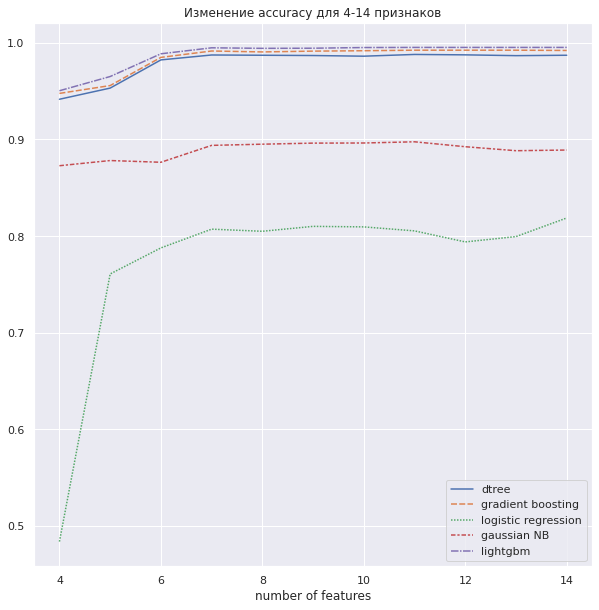

In [157]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=results_top_14,
             palette='deep')
ax = plt.title('Изменение accuracy для 4-14 признаков')

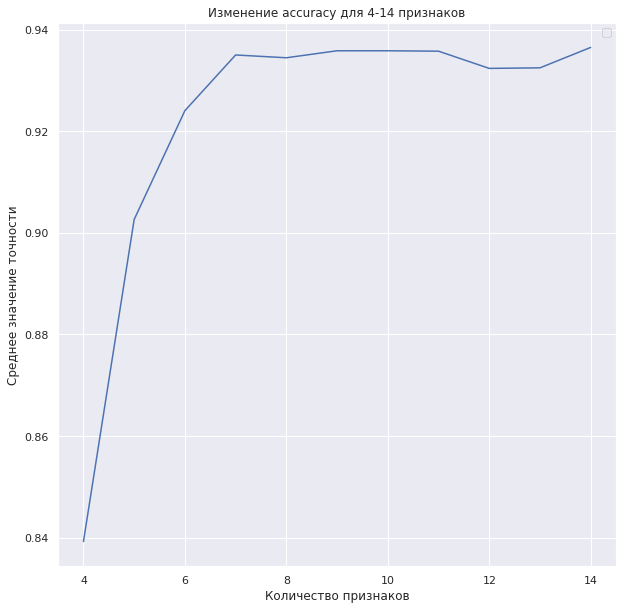

In [158]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=results_top_14.T.mean().to_frame(),
             palette='deep')
plt.title('Изменение accuracy для 4-14 признаков')
plt.ylabel('Среднее значение точности')
plt.legend('')
ax = plt.xlabel('Количество признаков')

In [162]:
acc = results_top_14.T.mean().to_list()
print('Количество признаков, обеспечивших максимальную среднюю точность: ', acc.index(max(acc)) + 4)

Количество признаков, обеспечивших максимальную среднюю точность:  14


Видим, что увеличение точности происходит вместе с увеличением количества признаков.

Оптимальное количество признаков на интервале [4,14] - 14.

## Без признаков, полученных хи-квадратом

Предположение: хи-квадрат выделяет не самые важные признаки, так как его применение в контексте имеющихся данных не особо корректно (имеем в качестве категориальной переменной только целевую, остальные - численные)

In [76]:
features = features_counts[:5]
features_without_chi_2 = features[~features.index.isin(chi_features)]

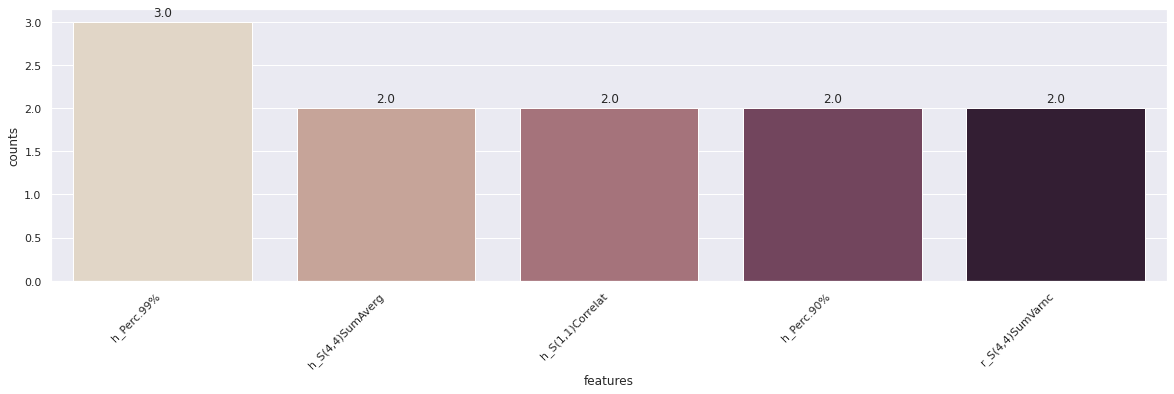

In [77]:
plt.figure(figsize=(20,5))
features_counts = features['counts'].sort_values(ascending=False).to_frame()
ax = sns.barplot(x=features_counts.index, y='counts', data=features_counts,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_xticklabels(features_counts.index, rotation = 45, ha="right")

In [78]:
features = features.index.to_list()
features

['h_Perc.99%',
 'r_S(4,4)SumVarnc',
 'h_Perc.90%',
 'h_S(1,1)Correlat',
 'h_S(4,4)SumAverg']

In [79]:
def calculate_accuracy_chi_2(clf, end_point):
  clf_results = []
  for num_features in range(4, end_point):
    score = cross_val_score(clf, data[features[:num_features]], data['class'], cv=10, scoring='accuracy')
    clf_results.append(np.mean(score))
    print('Средняя оценка для {} признаков: '.format(num_features), np.mean(score) )
  return clf_results

In [80]:
d_tree_results_chi2, gb_results_chi2, lr_results_chi2, lgb_results_chi2, gnb_results_chi2 = [],[],[],[],[]

In [82]:
d_tree_results_chi2 = calculate_accuracy_chi_2(dtree, 6)
gb_results_chi2 = calculate_accuracy_chi_2(gb, 6)
lr_results_chi2 = calculate_accuracy_chi_2(lr, 6)
lgb_results_chi2 = calculate_accuracy_chi_2(lgb, 6)
gnb_results_chi2 = calculate_accuracy_chi_2(gnb, 6)

Средняя оценка для 4 признаков:  0.9603563457508688
Средняя оценка для 5 признаков:  0.973846442415906
Средняя оценка для 4 признаков:  0.9596701035615629
Средняя оценка для 5 признаков:  0.9717833581532469
Средняя оценка для 4 признаков:  0.8319149984274405
Средняя оценка для 5 признаков:  0.8719887382010679
Средняя оценка для 4 признаков:  0.9651748193451333
Средняя оценка для 5 признаков:  0.9827950633002528
Средняя оценка для 4 признаков:  0.9164457504897671
Средняя оценка для 5 признаков:  0.925121162860315


In [84]:
results_top_5_chi = pd.DataFrame({'number of features': np.arange(4,6), 'dtree': d_tree_results_chi2,
                               'gradient boosting': gb_results_chi2, 'logistic regression': lr_results_chi2,
                               'gaussian NB': gnb_results_chi2, 'lightgbm': lgb_results_chi2})
results_top_5_chi= results_top_5_chi.set_index('number of features')
results_top_5_chi

,dtree,gradient boosting,logistic regression,gaussian NB,lightgbm
number of features,,,,,
4,0.960356,0.959670,0.831915,0.916446,0.965175
5,0.973846,0.971783,0.871989,0.925121,0.982795


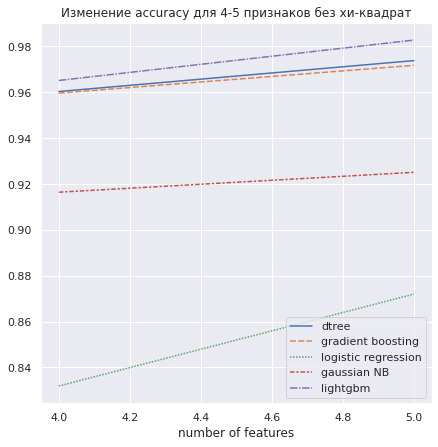

In [85]:

fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=results_top_5_chi,
             palette='deep')
ax = plt.title('Изменение accuracy для 4-5 признаков без хи-квадрат')

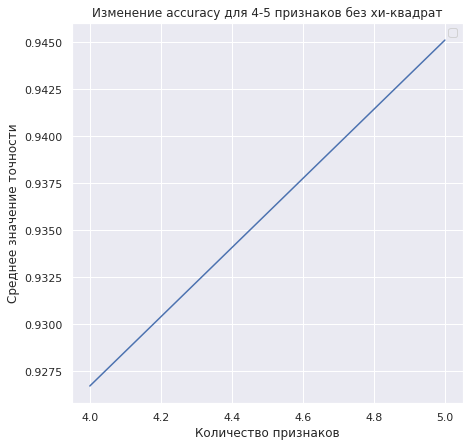

In [86]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=results_top_5_chi.T.mean().to_frame(),
             palette='deep')
plt.title('Изменение accuracy для 4-5 признаков без хи-квадрат')
plt.ylabel('Среднее значение точности')
plt.legend('')
ax = plt.xlabel('Количество признаков')

Сравним с топ-5 признаками, где использовался критерий хи-квадарт для отбора фич:

In [117]:
results_top_5 = results_top_5.rename(columns={'dtree': 'dtree-chi',	'gradient boosting': 'gradient boosting-chi',	
                                              'logistic regression': 'logistic regression-chi',	'gaussian NB': 'gaussian NB-chi',
                                              'lightgbm': 'lightgbm-chi'})

In [118]:
results_compare = pd.concat([results_top_5,results_top_5_chi], axis=1)
results_compare

,dtree-chi,gradient boosting-chi,logistic regression-chi,gaussian NB-chi,lightgbm-chi,dtree,gradient boosting,logistic regression,gaussian NB,lightgbm
number of features,,,,,,,,,,
4,0.941634,0.947693,0.483593,0.872803,0.950447,0.960356,0.959670,0.831915,0.916446,0.965175
5,0.953196,0.955813,0.760735,0.878172,0.965174,0.973846,0.971783,0.871989,0.925121,0.982795


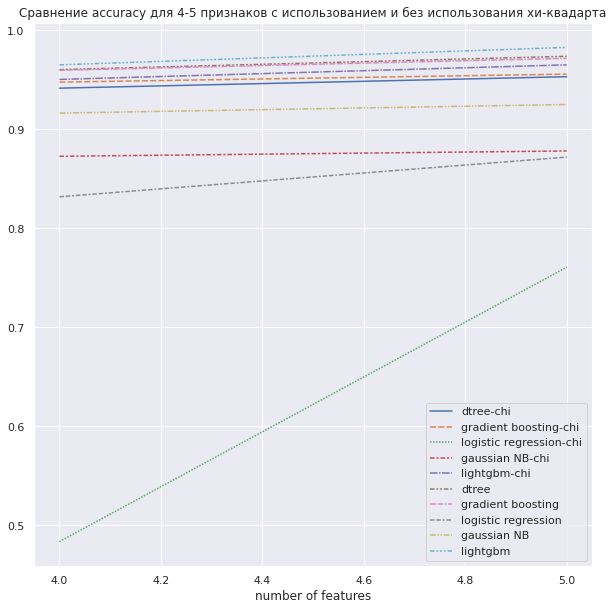

In [121]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=results_compare,
             palette='deep')
ax = plt.title('Сравнение accuracy для 4-5 признаков с использованием и без использования хи-квадарта')

In [142]:
results_compare['mean_chi'] = results_compare.iloc[:, :5].T.mean()
results_compare['mean_no_chi'] = results_compare.iloc[:, 5:].T.mean().to_frame()
results_compare.iloc[:, 10:]

,mean_chi,mean_no_chi
number of features,,
4,0.839234,0.912133
5,0.902618,0.938025


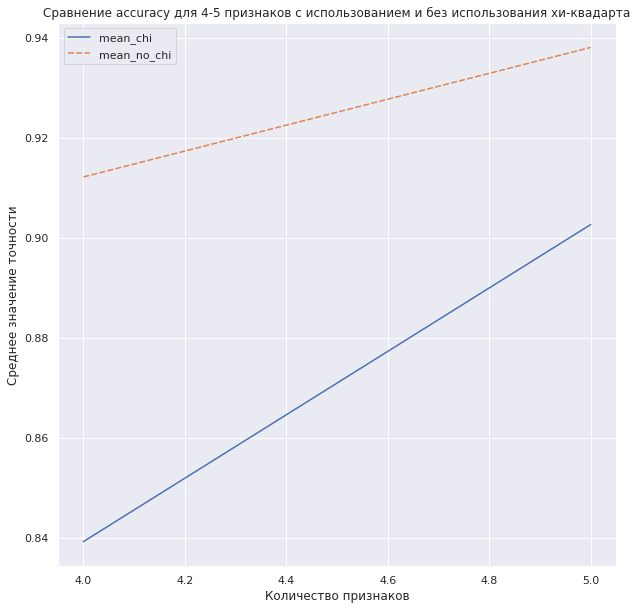

In [144]:
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data=results_compare.iloc[:, 10:], palette='deep')
plt.title('Сравнение accuracy для 4-5 признаков с использованием и без использования хи-квадарта')
plt.ylabel('Среднее значение точности')
ax = plt.xlabel('Количество признаков')

Видим, что в среднем accuracy выше у модели, которая не использовала признак хи-квадрат для отбора топ-5 признаков, значит, набор фич, полученных в результате хи-квадрата не является важным.

# <center> Результаты работы </center>

Резюмируя проведенную работу, могу сделать следующие выводы:

- Во-первых, перед использованием любого метода/алгоритма необходимо проводить первичный анализ данных, чтобы избежать трудностей/ошибок в процессе работы;
- Во-вторых, существует множество способов отбора признаков: базирующиеся на статистике (пиросн, хи-квадрат), алгоритмы жадного поиска (rfe) и алгоритмы, использующие модели машинного обучения (лассо регрессия (l1-регуляризация), деревья);
- В-третьих, кроме способов отбора признаков есть методы, направленные на понижение размерности пространства фич, что тоже является эффективным способом;
- В-четвертых, выбор алгоритма отбора признаков тоже является сложной задачей, которая требует понимания принципа работы самого алгоритма и характер имеющихся данных.